## Module 2: Lecture demo (Chebychev)

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams.update({'axes.labelsize': 18})
import numpy as np

### Function

(-2, 5)

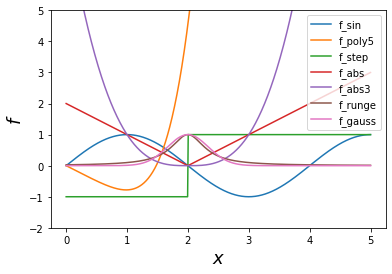

In [2]:
a, b = 0., 5.
n = 8
def f_sin(x): return np.sin(np.pi*x/2.)            # Sine-wave
def f_poly5(x): return 0.2*x**5 + 0.02*x**3 - x  # Polynomial
def f_step(x): return np.sign(x-2)                 # Discontinuous at x=2
def f_abs(x): return np.abs(x-2)                   # Discontinuous derivative at x=2
def f_abs3(x): return np.abs((x-2)**3)             # Discontinuous 3rd derivative at x=2
def f_runge(x): return 1./(1+(3*(x-2))**2)             # Infinitely differentiable (everywhere)
def f_gauss(x): return np.exp(-(3*(x-2))**2/2.)        # Very similar curve to above
def f_custom(x): pass                              # Your own function  

fs = [f_sin, f_poly5, f_step, f_abs, f_abs3, f_runge, f_gauss]
xx = np.linspace(a,b,1001)
for f in fs:
    plt.plot(xx, f(xx), label=f.__name__)
plt.xlabel(r'$x$'); plt.ylabel(r'$f$'); plt.legend(loc='upper right')
plt.ylim(-2,5)

### Grid

In [3]:
def grid_uniform(n): return np.linspace(a, b, n+1)
def grid_chebychev(n):
    xi = np.cos( np.pi/(2*(n+1)) * (2*np.linspace(1, n+1, n+1) - 1) )
    return ((-xi + 1)/2) * (b-a) + a

### Basis

In [4]:
def basis_monomial(x, grid):
    phi = np.zeros(len(grid))
    for i in range(len(grid)): phi[i] = x**i
    return phi

def basis_lagrange(x, grid):
    phi = np.ones(len(grid))
    for i, xi in enumerate(grid):
        for j,xj in enumerate(grid):
            if i != j: 
                phi[i] *= (x - xj) / (xi - xj)
    return phi

In [5]:
def plot_basis(basisfn, grid):
    xx = np.linspace(a, b, 101)
    phi = np.zeros((101, n+1))
    for i,x in enumerate(xx): 
        phi[i] = basisfn(x,grid)
    for j in range(n+1):
        plt.plot(xx, phi[:,j])
    plt.plot(grid, np.zeros(grid.shape), 'ok', label='samples')
    plt.xlabel(r'$x$'); plt.ylabel(r'$l_i$')

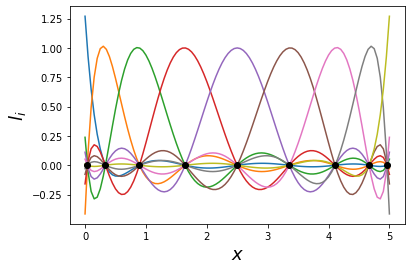

In [6]:
plot_basis(basis_lagrange, grid_chebychev(n))

### Interpolation

Text(0, 0.5, '$i$')

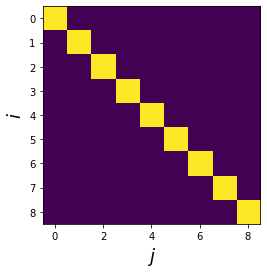

In [7]:
def interpolation_matrix(grid, basisfn):
    n = len(grid)-1
    A = np.zeros((n+1,n+1))
    for i in range(n+1):
        A[i,:] = basisfn(grid[i],grid)
    return A

A = interpolation_matrix(grid_chebychev(n), basis_lagrange)
#print(A)
plt.imshow(A, interpolation='none')
plt.xlabel(r'$j$'); plt.ylabel(r'$i$')

In [8]:
def poly_interp(xx, f, grid, basis):
    ff = np.array([f(xi) for xi in grid])
    if basis == basis_lagrange:
        aa = ff
    else:
        A = interpolation_matrix(grid, basis)   ### Interpolation conditions
        aa = np.linalg.solve(A,ff)
    basisxx = np.zeros((len(xx),len(grid))) ### Basis functions at all x values in xx
    for i,x in enumerate(xx):
        basisxx[i,:] = basis(x,grid)
    return np.dot(basisxx, aa)              ### Reconstruction

Usage is, for example:

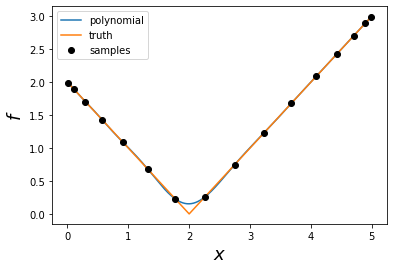

In [23]:
a, b = 0,5
f_test = f_abs
grid_test = grid_chebychev(15)
f_prediction = poly_interp(xx, f_test, grid_test, basis_lagrange)
plt.plot(xx, f_prediction, label='polynomial')
plt.plot(xx, f_test(xx), label='truth')
plt.plot(grid_test, f_test(grid_test), 'ok', label='samples')
plt.xlabel(r'$x$'); plt.ylabel(r'$f$'); plt.legend()

### Error

In [24]:
def error_max(xx, f, grid, basis):
    return np.max(np.abs(poly_interp(xx, f, grid, basis) - f(xx)))

In [25]:
def plot_convergence(f_fn, grid_fn, basis_fn, label):
    nn, linfty = range(2, 21), []
    xx = np.linspace(a, b, 201)
    for n in nn:
        linfty.append(error_max(xx, f_fn, grid_fn(n), basis_fn))
    plt.plot(nn, np.log10(np.array(linfty)), '-o', label=label)

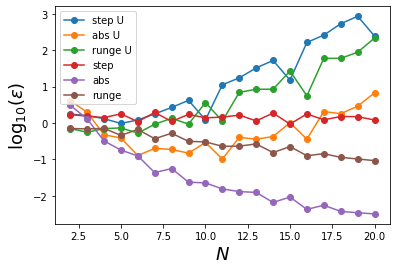

In [27]:
plot_convergence(f_step, grid_uniform, basis_lagrange, 'step U')
plot_convergence(f_abs3, grid_uniform, basis_lagrange, 'abs U')
plot_convergence(f_runge, grid_uniform, basis_lagrange, 'runge U')
plot_convergence(f_step, grid_chebychev, basis_lagrange, 'step')
plot_convergence(f_abs3, grid_chebychev, basis_lagrange, 'abs')
plot_convergence(f_runge, grid_chebychev, basis_lagrange, 'runge')
plt.xlabel(r'$N$'); plt.ylabel(r'$\log_{10}(\epsilon)$'); plt.legend()

### Nodal polynomial

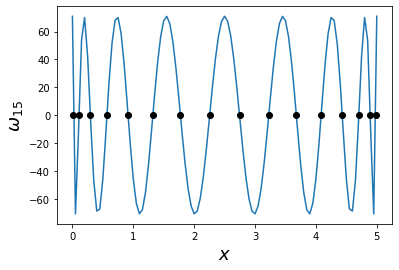

In [37]:
N = 15
grid_test = grid_chebychev(N)
def nodalpoly(x, grid):
    phi = np.ones(len(x))
    for xi in grid:
        phi *= (x - xi)
    return phi

def plot_nodalpoly(grid):
    xx = np.linspace(a, b, 101)
    plt.plot(xx, nodalpoly(xx, grid))
    plt.plot(grid, np.zeros(grid.shape), 'ok', label='samples')
    plt.xlabel(r'$x$'); plt.ylabel(r'$\omega_{%d}$' % N)
    
plot_nodalpoly(grid_test)